In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

X_train , X_val, y_train, y_val = train_test_split(X_train_full , y_train_full)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [4]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-05-25 06:18:27.025553: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-25 06:18:27.034686: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-25 06:18:27.217508: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-25 06:18:30.576183: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Building Complex Models Using the Functional API

One example of a non-sequential neural network is a Wide & Deep neural network. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). In
contrast, a regular MLP forces all the data to flow through the full stack of layers, thus simple patterns in the data may end up being distorted by this sequence of transformations

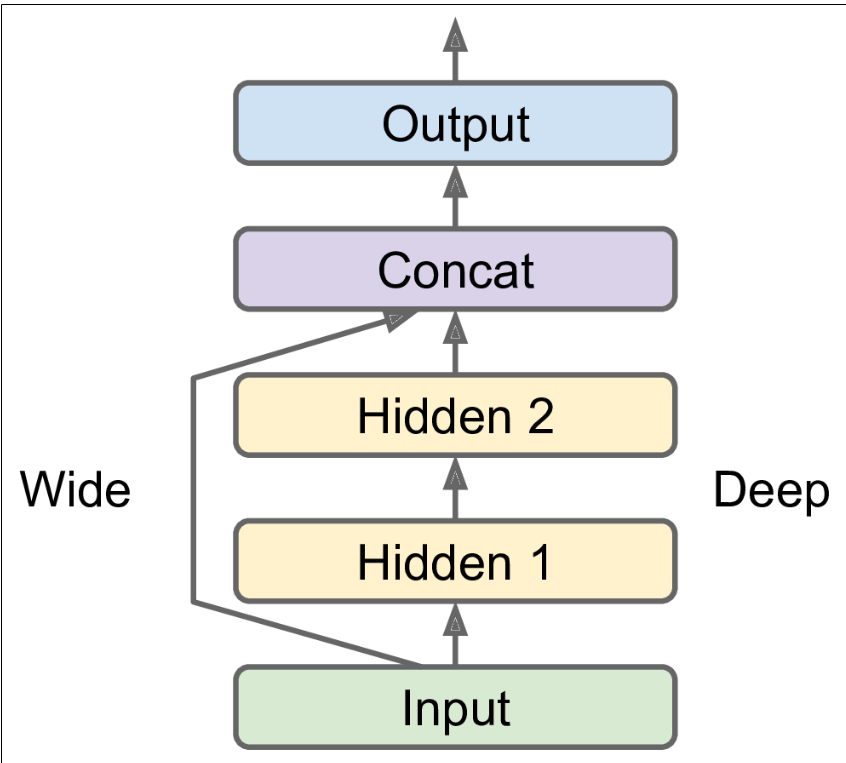

In [5]:
from tensorflow.keras.layers import Input, Concatenate
from tensorflow.keras.models import Model


In [6]:
input = Input(shape=X_train.shape[1:])
hidden1 = Dense(30, activation="relu")(input)
hidden2 = Dense(30, activation="relu")(hidden1)

concat  = Concatenate()([input, hidden2])
output = Dense(1)(concat)
model = Model(inputs=[input], outputs=[output])

But what if you want to send a subset of the features through the wide path, and a different subset (possibly overlapping) through the deep path. In this case, one solution is to use multiple inputs. For example, suppose we want to send 5 features through the deep path (features 0 to 4), and 6 features through the wide path (features 2 to 7):

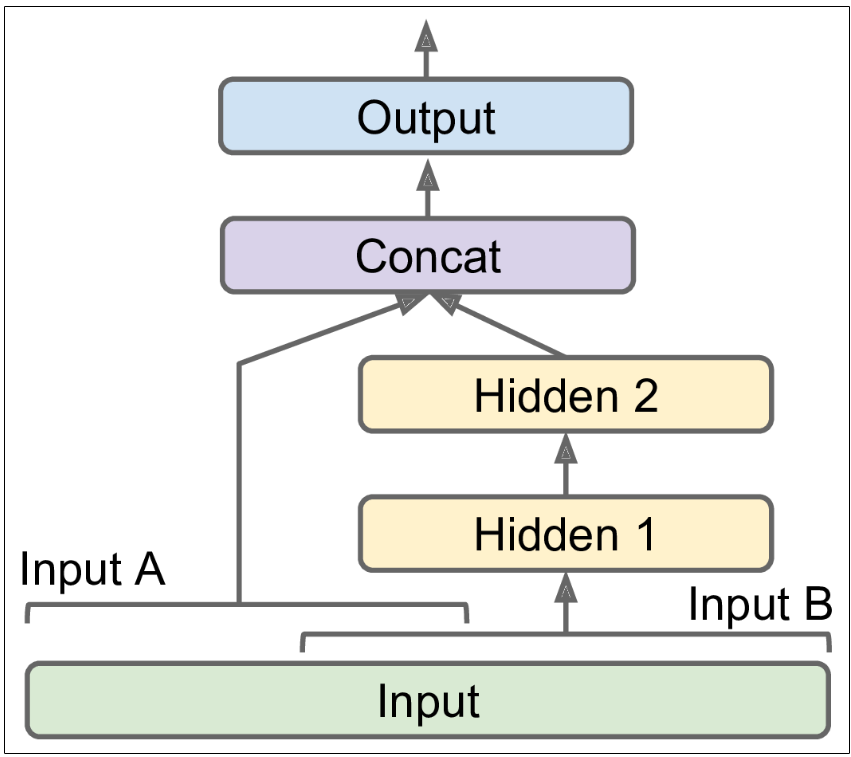

In [7]:
input_A = Input(shape=[5])
input_B = Input(shape=[6])

hidden1 = Dense(30, activation="relu")(input_B)
hidden2 = Dense(30, activation="relu")(hidden1)

concat = Concatenate()([input_A, hidden2])
output = Dense(1)(concat)

model = Model(inputs=[input_A, input_B], outputs=[output])

In [8]:
model.compile(loss="mse", optimizer="sgd")

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_val[:, :5], X_val[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_val))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: nan - val_loss: nan
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: nan - val_loss: nan
Epoch 13/20
363/363 ━━━━━━━━━━━━

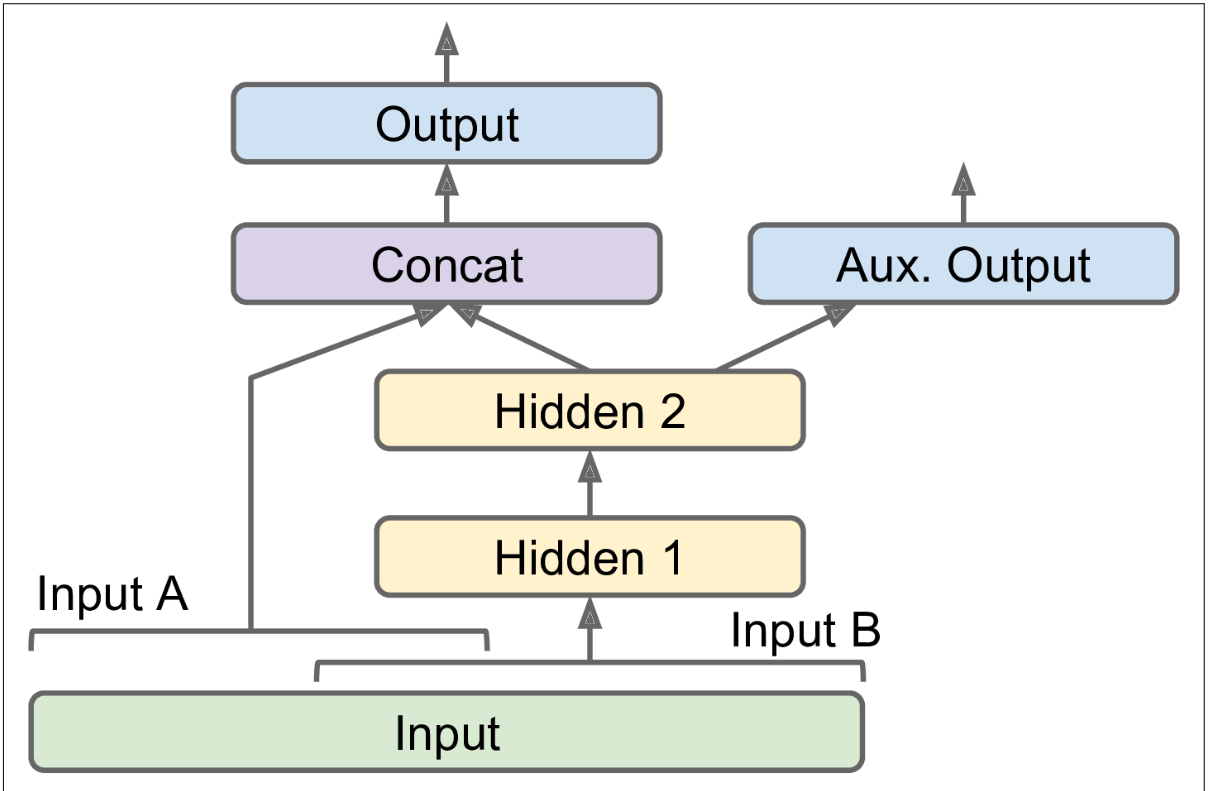

In [9]:
input_A = Input(shape=[5])
input_B = Input(shape=[6])

hidden1 = Dense(30, activation='relu')(input_B)
hidden2 = Dense(30, activation='relu')(hidden1)

concat = Concatenate()([input_A, hidden2])

output = Dense(1)(concat)
aux_output = Dense(1)(hidden2)

model = Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [10]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [11]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_val, y_val]))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 13/20
363/363 ━━━━━━━━━━━

In [12]:
# total_loss, main_loss, aux_loss = model.evaluate(
# [X_test_A, X_test_B], [y_test, y_test])

In [13]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


# Saving and restoring a model

In [14]:
model.save('functional_api.keras')

You will typically have a script that trains a model and saves it, and one or more scripts (or web services) that load the model and use it to make predictions. Loading the model is just as easy:

In [15]:
from tensorflow.keras.models import load_model

In [16]:
model = load_model('functional_api.keras')